In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Read file
data = pd.read_csv("../../tiny_sample.csv", index_col = 0)

In [4]:
len(data)

500000

In [5]:
data.drop(["outlier"], inplace = True, axis = 1)

In [6]:
data.columns

Index(['duration_seconds', 'miles', 'fare', 'tip', 'tolls', 'extra_charges',
       'trip_total', 'payment_type', 'start_month', 'start_weekday',
       'speed_pickup_start', 'speed_category_pickup_start',
       'bus_count_pickup_start', 'gps_pings_pickup_start', 'speed_dropoff_end',
       'speed_category_dropoff_end', 'bus_count_dropoff_end',
       'gps_pings_dropoff_end', 'region_pickup', 'region_dropoff', 'tip_flag',
       'ride_type', 'flag_overnight', 'total_no_tip', 'start_hour',
       'flag_weekend'],
      dtype='object')

In [7]:
# Summarize tipping behaviour
tip_summary = data.groupby(["tip_flag", "ride_type"], as_index = False)["region_pickup"].count()
tip_summary.columns = ["tip_flag", "ride_type", "Q"]
tip_summary

,tip_flag,ride_type,Q
0,0,Rideshare,360468
1,0,Taxi,33798
2,1,Rideshare,78215
3,1,Taxi,27519


In [8]:
tip_summary = pd.DataFrame(tip_summary)

In [9]:
tip_summary

,tip_flag,ride_type,Q
0,0,Rideshare,360468
1,0,Taxi,33798
2,1,Rideshare,78215
3,1,Taxi,27519


In [10]:
# Summarize cost of trips
cost_summary = data.groupby(["ride_type"], as_index = False)["total_no_tip"].sum()
cost_summary.columns = ["ride_type", "USD"]
cost_summary

,ride_type,USD
0,Rideshare,5.476192e+06
1,Taxi,6.471369e+05


In [11]:
# Summarize count of trips
q_summary = data.groupby(["ride_type"], as_index = False)["total_no_tip"].count()
q_summary.columns = ["ride_type", "Q"]
q_summary

,ride_type,Q
0,Rideshare,438683
1,Taxi,61317


In [12]:
# Average cost of trips
av_cost_summary = pd.DataFrame(cost_summary)
av_cost_summary["Q"] = q_summary["Q"]
av_cost_summary["avg"] = av_cost_summary["USD"]/av_cost_summary["Q"]

In [13]:
av_cost_summary

,ride_type,USD,Q,avg
0,Rideshare,5.476192e+06,438683,12.483256
1,Taxi,6.471369e+05,61317,10.553955


In [14]:
# Average cost of trips
av_cost_summary = pd.DataFrame(cost_summary)
av_cost_summary["Q"] = q_summary["Q"]
av_cost_summary["avg"] = av_cost_summary["USD"]/av_cost_summary["Q"]

In [15]:
sum(data.loc[data["ride_type"] == "Taxi", "duration_seconds"])

39738448.0

In [16]:
data.columns

Index(['duration_seconds', 'miles', 'fare', 'tip', 'tolls', 'extra_charges',
       'trip_total', 'payment_type', 'start_month', 'start_weekday',
       'speed_pickup_start', 'speed_category_pickup_start',
       'bus_count_pickup_start', 'gps_pings_pickup_start', 'speed_dropoff_end',
       'speed_category_dropoff_end', 'bus_count_dropoff_end',
       'gps_pings_dropoff_end', 'region_pickup', 'region_dropoff', 'tip_flag',
       'ride_type', 'flag_overnight', 'total_no_tip', 'start_hour',
       'flag_weekend'],
      dtype='object')

In [22]:
num_vars = ["duration_seconds", "miles", "fare", "tip", "tolls", "extra_charges", "trip_total", 
            "speed_pickup_start", "bus_count_pickup_start", "gps_pings_pickup_start", "speed_dropoff_end", 
           "bus_count_dropoff_end", "gps_pings_dropoff_end", "total_no_tip", "start_month", "start_hour"]

In [17]:
some_num_vars = ["tip", "total_no_tip", "duration_seconds", "miles", "speed_pickup_start", "bus_count_pickup_start", 
            "gps_pings_pickup_start", "speed_dropoff_end"]

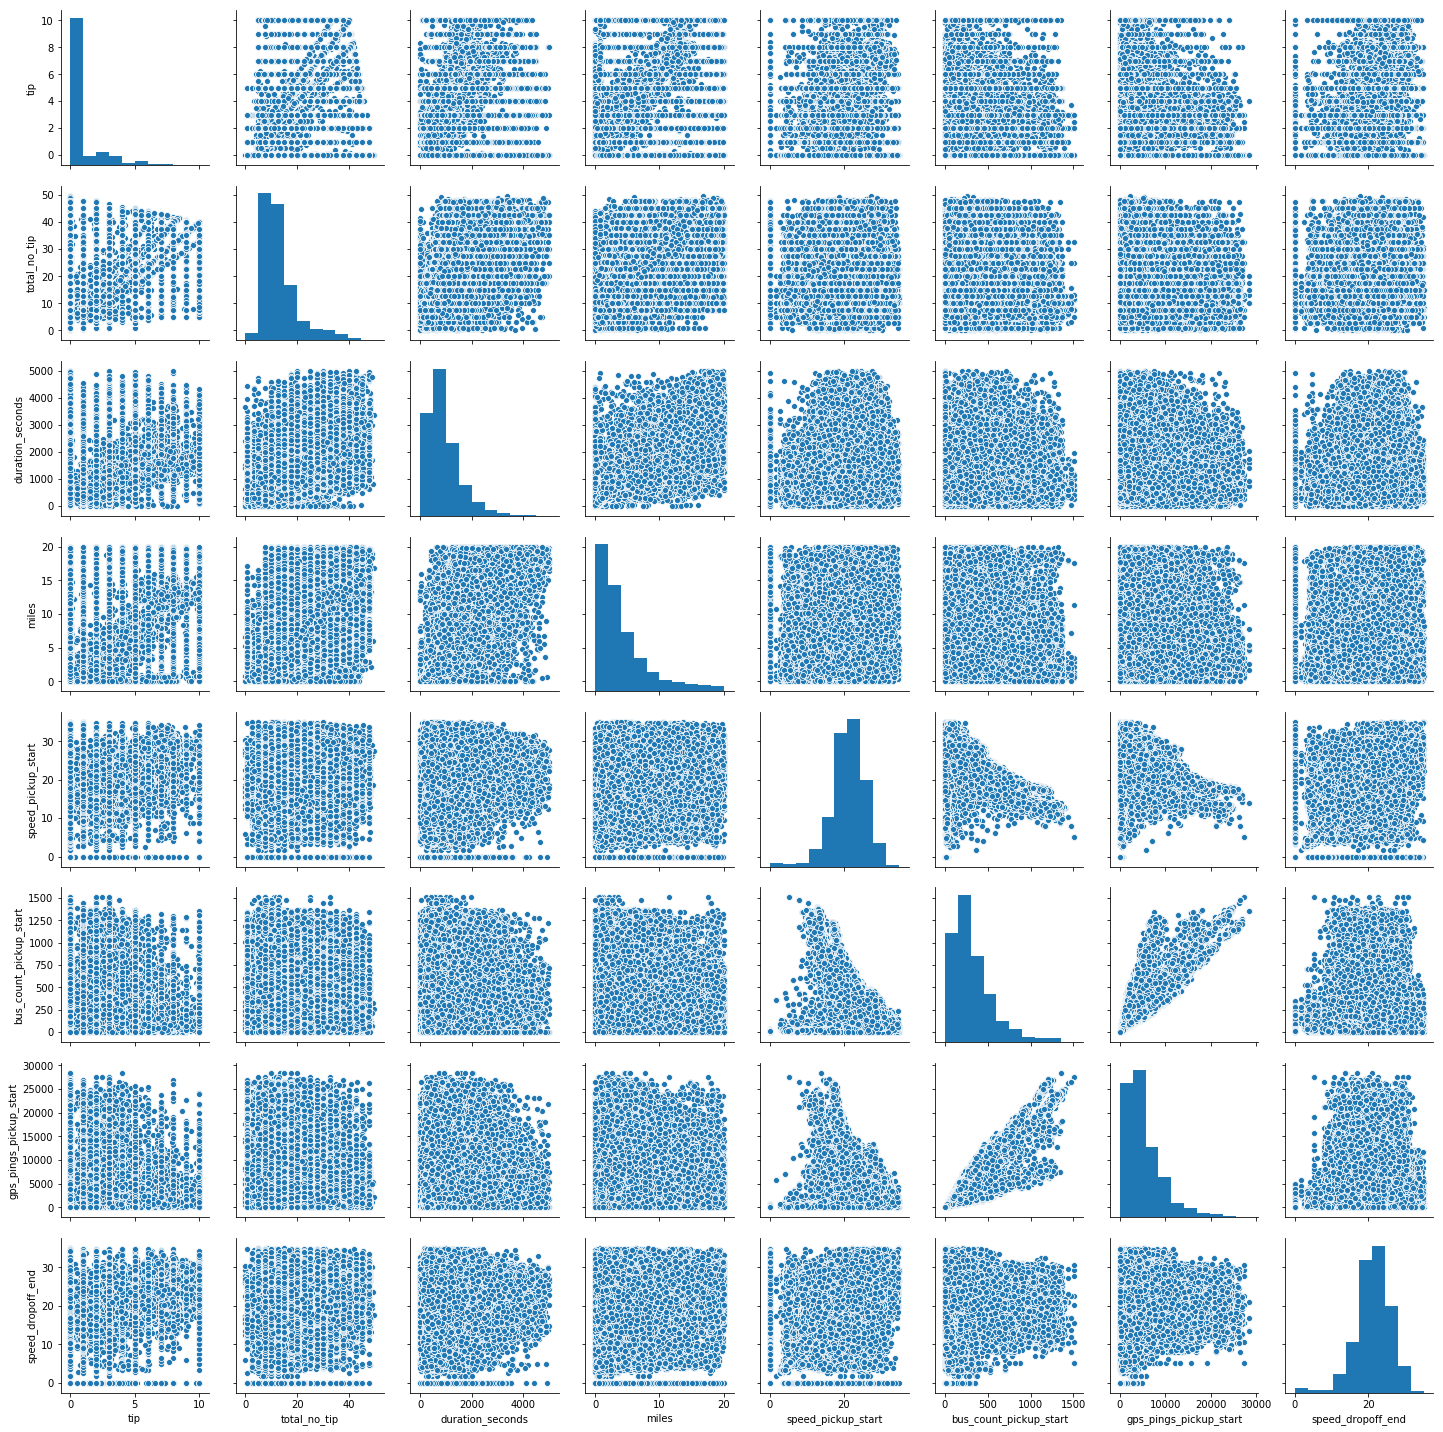

In [29]:
# Basic correlogram
sns.pairplot(data[some_num_vars])
plt.show()